In [2]:
from dash import Dash, html, dcc, Input, Output, callback
import pandas as pd
import plotly.express as px
import glob as glob

In [12]:


# path = "data/observables/combinedData/"
# orderParameterData = sorted(glob.glob(path+"*.csv"))

# delay0df = pd.read_csv(orderParameterData[0])
# delay1df = pd.read_csv(orderParameterData[1])
# delay3df = pd.read_csv(orderParameterData[2])
# delay5df = pd.read_csv(orderParameterData[3])
# df= pd.concat([delay0df, delay1df,delay3df,delay5df], axis=0)

df = pd.read_csv("data/observables/combinedData/averagedObservables.csv")

# df['snapshotPath']=df['snapshotPath'].replace('../','')

def edit_string(text):
  # Replace 'a' with 'X' in the string
  return text.replace('.txt', '.csv')


df['timeseriesPath'] = df['timeseriesPath'].apply(edit_string)
print(df)

df.to_csv('data/observables/combinedData/averagedObservables.csv', encoding='utf-8', index=False)


     Delay   Noise  Average Polar Orderparameter  \
0        0  0.4000                      0.543411   
1        0  0.4050                      0.525968   
2        0  0.4100                      0.512464   
3        0  0.4150                      0.495395   
4        0  0.4200                      0.482337   
..     ...     ...                           ...   
128      5  0.6766                      0.004640   
129      5  0.6768                      0.004582   
130      5  0.6800                      0.004411   
131      5  0.6850                      0.004167   
132      5  0.6900                      0.004025   

     Average Polar Orderparameter Squared  \
0                                0.295349   
1                                0.276707   
2                                0.262692   
3                                0.245497   
4                                0.232728   
..                                    ...   
128                              0.000027   
129            

   Delay  Noise  Average Polar Orderparameter  \
0      0  0.400                      0.543003   
1      0  0.405                      0.526604   
2      0  0.410                      0.513007   
3      0  0.415                      0.494893   
4      0  0.420                      0.481581   

   Average Polar Orderparameter Squared  \
0                              0.294907   
1                              0.277376   
2                              0.263245   
3                              0.245009   
4                              0.232003   

   Average Polar Orderparameter Fourth Power  Variance    Binder  \
0                                   0.087034  0.000055  0.666420   
1                                   0.077009  0.000065  0.666357   
2                                   0.069371  0.000069  0.666317   
3                                   0.060117  0.000090  0.666181   
4                                   0.053901  0.000082  0.666198   

                                     

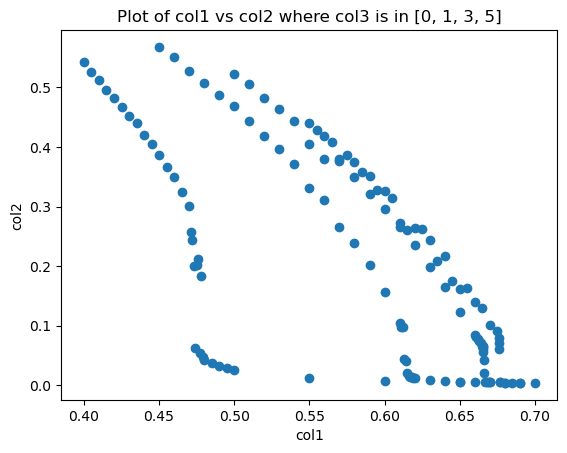

In [12]:

import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('data/observables/combinedData/averagedObservables.csv')
print(df.head())

selectedDelays = [0,1,3,5]


# Filter data based on multiple conditions
filtered_df = df[df['Delay'].isin(selectedDelays)]

# Select columns for plotting
x = filtered_df['Noise']
y = filtered_df['Average Polar Orderparameter']

# Create the plot (scatter plot in this example)
plt.scatter(x, y)

# Add labels and title
plt.xlabel('col1')
plt.ylabel('col2')
plt.title(f'Plot of col1 vs col2 where col3 is in {selectedDelays}')

# Show the plot
plt.show()



In [4]:
import dash
from dash import dcc, html

app = dash.Dash(__name__)

# Define the checklist options
options = [
    {'label': 'Option 1', 'value': '-1'},
    {'label': 'Option 2', 'value': 'option-2'},
    {'label': 'Option 3', 'value': 'option-3'},
]

# Layout of the app
app.layout = html.Div([
    dcc.Checklist(
        id='my-checklist',
        options=options,
        labelStyle={'display': 'block'}  # Display labels on separate lines
    ),
    html.Div(id='output-container')  # Container for displaying selections
])

# Callback function to update output based on checklist selections
@app.callback(
    Output(component_id='output-container', component_property='children'),
    Input(component_id='my-checklist', component_property='value')
)
def update_output(selected_values):
    if selected_values is None:
        return 'No options selected.'
    return f'You selected: {", ".join(selected_values)}'  # Join selected values

if __name__ == '__main__':
    app.run_server(debug=True)


In [1]:
import dash
import dash_html_components as html
import dash_core_components as dcc
import plotly.graph_objs as go

app = dash.Dash(__name__)

app.layout = html.Div([
    html.Div([
        dcc.Graph(
            id='example-graph',
            figure={
                'data': [
                    {'x': [1, 2, 3], 'y': [4, 1, 2], 'type': 'bar', 'name': 'SF'},
                    {'x': [1, 2, 3], 'y': [2, 4, 5], 'type': 'bar', 'name': u'Montréal'},
                ],
                'layout': {
                    'title': 'Dash Data Visualization'
                }
            }
        ),
    ], style={'width': '50%', 'display': 'inline-block'}),
    html.Div([
        html.Img(src='https://via.placeholder.com/150', style={'width': '100%', 'display': 'inline-block'})
    ], style={'width': '50%', 'display': 'inline-block'})
])

if __name__ == '__main__':
    app.run_server(debug=True)


/tmp/ipykernel_190243/1977145566.py:2: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
/tmp/ipykernel_190243/1977145566.py:3: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc


In [40]:
from dash import Dash, html, dcc, Input, Output, callback
import pandas as pd
import plotly.express as px

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = Dash(__name__, external_stylesheets=external_stylesheets)

df = pd.read_csv('https://plotly.github.io/datasets/country_indicators.csv')


app.layout = html.Div([
    html.Div([

        html.Div([
            dcc.Dropdown(
                df['Indicator Name'].unique(),
                'Fertility rate, total (births per woman)',
                id='crossfilter-xaxis-column',
            ),
            dcc.RadioItems(
                ['Linear', 'Log'],
                'Linear',
                id='crossfilter-xaxis-type',
                labelStyle={'display': 'inline-block', 'marginTop': '5px'}
            )
        ],
        style={'width': '49%', 'display': 'inline-block'}),

        html.Div([
            dcc.Dropdown(
                df['Indicator Name'].unique(),
                'Life expectancy at birth, total (years)',
                id='crossfilter-yaxis-column'
            ),
            dcc.RadioItems(
                ['Linear', 'Log'],
                'Linear',
                id='crossfilter-yaxis-type',
                labelStyle={'display': 'inline-block', 'marginTop': '5px'}
            )
        ], style={'width': '49%', 'float': 'right', 'display': 'inline-block'})
    ], style={
        'padding': '10px 5px'
    }),

    html.Div([
        dcc.Graph(
            id='crossfilter-indicator-scatter',
            hoverData={'points': [{'customdata': 'Japan'}]}
        )
    ], style={'width': '49%', 'display': 'inline-block', 'padding': '0 20'}),
    html.Div([
        dcc.Graph(id='x-time-series'),
        dcc.Graph(id='y-time-series'),
    ], style={'display': 'inline-block', 'width': '49%'}),

    html.Div(dcc.Slider(
        df['Year'].min(),
        df['Year'].max(),
        step=None,
        id='crossfilter-year--slider',
        value=df['Year'].max(),
        marks={str(year): str(year) for year in df['Year'].unique()}
    ), style={'width': '49%', 'padding': '0px 20px 20px 20px'})
])


@callback(
    Output('crossfilter-indicator-scatter', 'figure'),
    Input('crossfilter-xaxis-column', 'value'),
    Input('crossfilter-yaxis-column', 'value'),
    Input('crossfilter-xaxis-type', 'value'),
    Input('crossfilter-yaxis-type', 'value'),
    Input('crossfilter-year--slider', 'value'))
def update_graph(xaxis_column_name, yaxis_column_name,
                 xaxis_type, yaxis_type,
                 year_value):
    dff = df[df['Year'] == year_value]

    fig = px.scatter(x=dff[dff['Indicator Name'] == xaxis_column_name]['Value'],
            y=dff[dff['Indicator Name'] == yaxis_column_name]['Value'],
            hover_name=dff[dff['Indicator Name'] == yaxis_column_name]['Country Name']
            )

    fig.update_traces(customdata=dff[dff['Indicator Name'] == yaxis_column_name]['Country Name'])

    fig.update_xaxes(title=xaxis_column_name, type='linear' if xaxis_type == 'Linear' else 'log')

    fig.update_yaxes(title=yaxis_column_name, type='linear' if yaxis_type == 'Linear' else 'log')

    fig.update_layout(margin={'l': 40, 'b': 40, 't': 10, 'r': 0}, hovermode='closest')

    return fig


def create_time_series(dff, axis_type, title):

    fig = px.scatter(dff, x='Year', y='Value')

    fig.update_traces(mode='lines+markers')

    fig.update_xaxes(showgrid=False)

    fig.update_yaxes(type='linear' if axis_type == 'Linear' else 'log')

    fig.add_annotation(x=0, y=0.85, xanchor='left', yanchor='bottom',
                       xref='paper', yref='paper', showarrow=False, align='left',
                       text=title)

    fig.update_layout(height=225, margin={'l': 20, 'b': 30, 'r': 10, 't': 10})

    return fig


@callback(
    Output('x-time-series', 'figure'),
    Input('crossfilter-indicator-scatter', 'hoverData'),
    Input('crossfilter-xaxis-column', 'value'),
    Input('crossfilter-xaxis-type', 'value'))
def update_x_timeseries(hoverData, xaxis_column_name, axis_type):
    country_name = hoverData['points'][0]['customdata']
    dff = df[df['Country Name'] == country_name]
    dff = dff[dff['Indicator Name'] == xaxis_column_name]
    title = '<b>{}</b><br>{}'.format(country_name, xaxis_column_name)
    return create_time_series(dff, axis_type, title)


@callback(
    Output('y-time-series', 'figure'),
    Input('crossfilter-indicator-scatter', 'hoverData'),
    Input('crossfilter-yaxis-column', 'value'),
    Input('crossfilter-yaxis-type', 'value'))
def update_y_timeseries(hoverData, yaxis_column_name, axis_type):
    dff = df[df['Country Name'] == hoverData['points'][0]['customdata']]
    dff = dff[dff['Indicator Name'] == yaxis_column_name]
    return create_time_series(dff, axis_type, yaxis_column_name)


if __name__ == '__main__':
    app.run(debug=True)
